In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [4]:
image = train_x[0]

In [5]:
image.shape

(28, 28)

In [6]:
# [batch_size, height, width, channel]

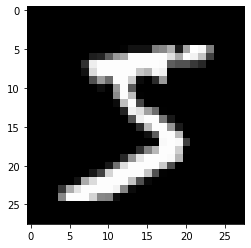

In [7]:
plt.imshow(image,'gray')
plt.show()

In [8]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

In [9]:
# feature extraction (convolution , polling) < - 예측 x , 특징 추출
# classification

In [11]:
tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides = (1,1), padding='SAME', activation='relu')

In [13]:
image = tf.cast(image, dtype= tf.float32)
image.dtype

tf.float32

In [28]:
layer = tf.keras.layers.Conv2D(5,3,1,padding='SAME')
layer

In [29]:
output = layer(image)
output

<tf.Tensor: shape=(1, 28, 28, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0

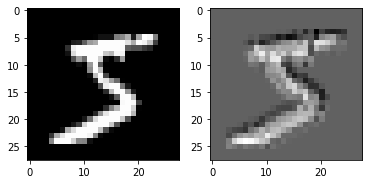

In [30]:
plt.subplot(1,2,1)
plt.imshow(image[0,:,:,0],'gray')
plt.subplot(1,2,2)
plt.imshow(output[0, :,:,0],'gray')
plt.show()

In [31]:
import numpy as np
np.min(image), np.max(image)

(0.0, 255.0)

In [32]:
np.min(output) , np.max(output)

(-151.6205, 139.79396)

In [33]:
# 여기서부터 5강

weight = layer.get_weights()

In [34]:
weight.shape

AttributeError: 'list' object has no attribute 'shape'

In [35]:
len(weight)

2

In [36]:
weight[0].shape, weight[1].shape

((3, 3, 1, 5), (5,))

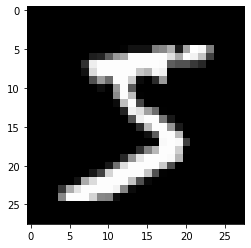

In [45]:
plt.imshow(image[0,:,:,0],'gray')
plt.show()

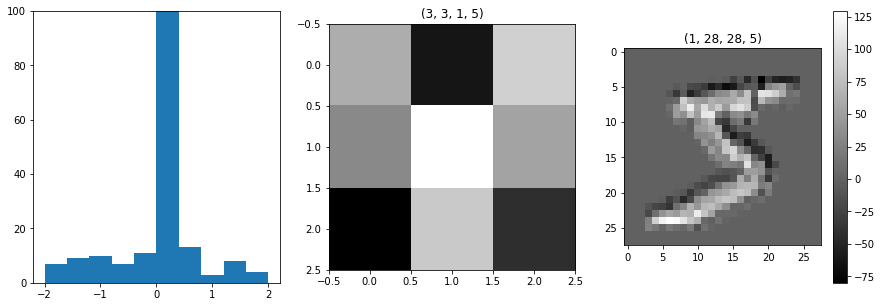

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0], 'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()


In [46]:
import numpy as np

np.min(output), np.max(output)

(-151.6205, 139.79396)

In [47]:
tf.keras.layers.ReLU()

In [48]:
act_layer = tf.keras.layers.ReLU()
act_output=act_layer(output)

In [49]:
act_output

<tf.Tensor: shape=(1, 28, 28, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         ...,
         [0., 0

In [50]:
np.min(act_output), np.max(act_output)

(0.0, 139.79396)

In [56]:
act_output.shape

TensorShape([1, 28, 28, 5])

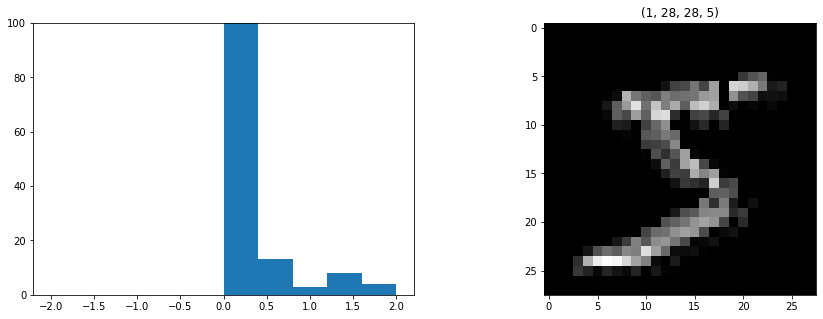

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0,:,:,0],'gray')

plt.show()

In [61]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2),padding='SAME')
pool_output=pool_layer(act_output)

In [62]:
act_output.shape

TensorShape([1, 28, 28, 5])

In [63]:
pool_output.shape

TensorShape([1, 14, 14, 5])

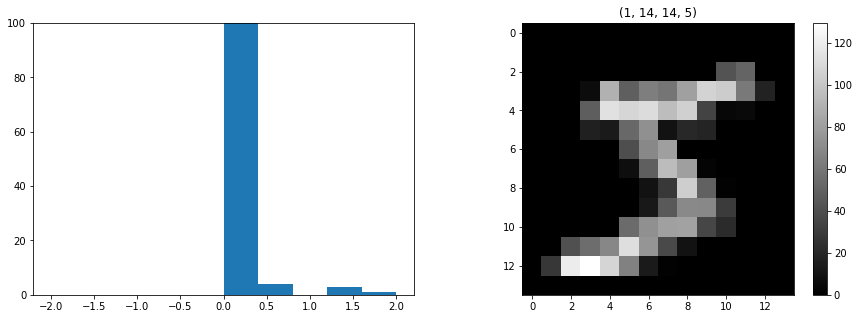

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range = [-2,2])
plt.ylim(0,100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0,:,:,0],'gray')
plt.colorbar()

plt.show()

In [65]:
# 여기서부터 6강

In [66]:
import tensorflow as tf

In [67]:
layer = tf.keras.layers.Flatten()

In [68]:
flatten = layer(output)

In [69]:
output.shape

TensorShape([1, 28, 28, 5])

In [70]:
flatten.shape

TensorShape([1, 3920])

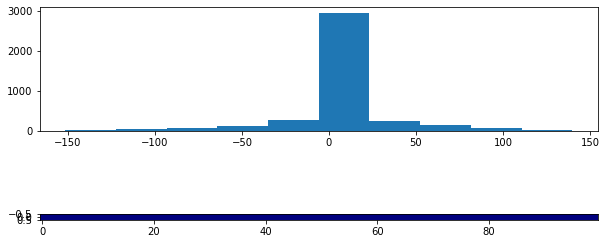

In [73]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.subplot(212)
plt.imshow(flatten[:,:100],'jet')
plt.show()

In [75]:
layer = tf.keras.layers.Dense(32,activation='relu')

In [76]:
output = layer(flatten)

In [77]:
output.shape

TensorShape([1, 32])

In [78]:
layer_2 = tf.keras.layers.Dense(10, activation = 'relu')
output_example = layer_2(output)

In [79]:
output_example.shape

TensorShape([1, 10])

In [80]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)

In [81]:
output.shape

TensorShape([1, 32])

In [82]:
from tensorflow.keras import layers

In [83]:
input_shape = (28,28,1)
num_classes = 10

In [86]:
inputs = layers.Input(shape=input_shape)

# Feature Extraction
net = layers.Conv2D(32,3,padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64,3,padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

#Fully Connected
net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(10)(net) # 클래스의 개수에 맞게 10개로 !
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs= inputs, outputs=net, name='Basic_CNN')

In [87]:
model

In [88]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0 